# IKpy Quickstart #

# Requirements

First, you need to install IKPy (see [installations instructions](https://github.com/Phylliade/ikpy)).
You also need a URDF file.  
By default, we use the files provided in the [resources](https://github.com/Phylliade/ikpy/tree/master/resources) folder of the IKPy repo.

Import the IKPy module : 

In [1]:
import ikpy.chain
import numpy as np
import ikpy.utils.plot as plot_utils

The basic element of IKPy is the kinematic `Chain`.
To create a chain from an URDF file : 

In [2]:
my_chain = ikpy.chain.Chain.from_urdf_file("poppy_ergo.URDF")

d:\CODE @ IISc\UCR MAIN\URC\.venv\Lib\site-packages\ikpy\chain.py:60: UserWarning: Link Base link (index: 0) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive
  warnings.warn("Link {} (index: {}) is of type 'fixed' but set as active in the active_links_mask. In practice, this fixed link doesn't provide any transformation so is as it were inactive".format(link.name, link_index))


In [ ]:
my_chain

In [ ]:
type(my_chain)

Note : as mentioned before, here we use a file in the resource folder.

# Inverse kinematics

In Inverse Kinematics, you want your kinematic chain to reach a 3D position in space.

To have a more general representation of position, IKPy works with homogeneous coordinates. It is a 4x4 matrix storing both position and orientation.
Prepare your desired position as a 4x4 matrix. Here we only consider position, not orientation of the chain.

In [3]:
target_position = [ 0.1, -0.45, 0.1]

In [4]:
print("The angles of each joints are : ", my_chain.inverse_kinematics(target_position))

The angles of each joints are :  [ 1.75390603e-15  1.35034308e+00 -1.50473104e+00  8.39398126e-01
 -8.79200664e-05  7.31462819e-01  0.00000000e+00]


You can check that the Inverse Kinematics is correct by comparing with the original position vector : 

In [5]:
real_frame = my_chain.forward_kinematics(my_chain.inverse_kinematics(target_position))
print("Computed position vector : %s, original position vector : %s" % (real_frame[:3, 3], target_position))

Computed position vector : [ 0.05029865 -0.22815637  0.0849738 ], original position vector : [0.1, -0.45, 0.1]


# Plotting
And finally plot the result : 

(If the code below doesn't work, comment the `%maplotlib widget` line, and uncomment the `%matplotlib inline` line)

(-0.1, 0.1)

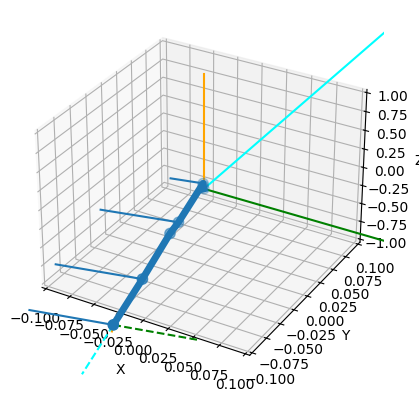

In [6]:
# Optional: support for 3D plotting in the NB
# If there is a matplotlib error, uncomment the next line, and comment the line below it.
# %matplotlib inline
# %matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plot_utils.init_3d_figure()
my_chain.plot(my_chain.inverse_kinematics(target_position), ax, target=target_position)
plt.xlim(-0.1, 0.1)
plt.ylim(-0.1, 0.1)

You're done! Go to the [tutorials](https://github.com/Phylliade/ikpy/blob/master/tutorials/ikpy/getting_started.md) to understand the general concepts of the library.